## Importing Required Libraries

In [155]:
#Uncomment to download the library required to test CEC test functions
#!pip install opfunu

In [156]:
#Functions to handle with relative imports
import sys
sys.path.insert(1, '../DifferentialEvolution')

In [157]:
#Imports of class and functions required
from opfunu import get_functions_by_classname
from DifferentialEvolution_Clustering import DifferentialEvolution_Clustering
from DifferentialEvolution import DifferentialEvolution
from sklearn import cluster
from PlottingFunctions import PlottingSnapshots

## Auxiliar Functions

In [158]:
def objectiveFunctionCEC(functionNumber:str,yearCEC:str='2017',dimension:int=2):
    """
        Function wrapper to return the CEC's function with the given parameters
        -- functionNumber : Function's number
        -- yearCEC : Function's year which belongs
        -- dimension : Function's dimensions
    """    
    function = get_functions_by_classname(f'F{functionNumber}{yearCEC}')[0](ndim=dimension)
    def objectiveFunction_inner(solutionVector):
        return function.evaluate(solutionVector)
    return objectiveFunction_inner

In [159]:
def individual(lower_bound:float=-100,upper_bound:float=100,dimension:int=2):
    """
        Function to create a random individual
        -- lower_bound : Minimum value to each individual's component
        -- upper_bound : Maximum value to each individual's component
        -- dimension : Individual's dimension
    """
    def individual_inner():
        from numpy import random
        individual = random.default_rng().uniform(lower_bound,upper_bound,dimension)
        return individual
    return individual_inner

## Differential Evolution

In [160]:
#Init Diff Evol
functionNumber = '9'
dimension = 2   #Dimensions = 2, 10, 20, 30, 50 or 100. Some functions doesn't work with all dimensions
objectiveFunction = objectiveFunctionCEC(functionNumber,dimension=dimension)

lower , upper = -100 , 100
initializeIndividual = individual(lower,upper,dimension)

DiffEvol = DifferentialEvolution(objectiveFunction,initializeIndividual)

In [161]:
#Calling Diff Evol to find optimal
iterations = 100
populationSize = 100
scalingFactor = 0.7
crossoverRate = 0.5

optimalFound , snapshots = DiffEvol(iterations,populationSize,scalingFactor,crossoverRate)

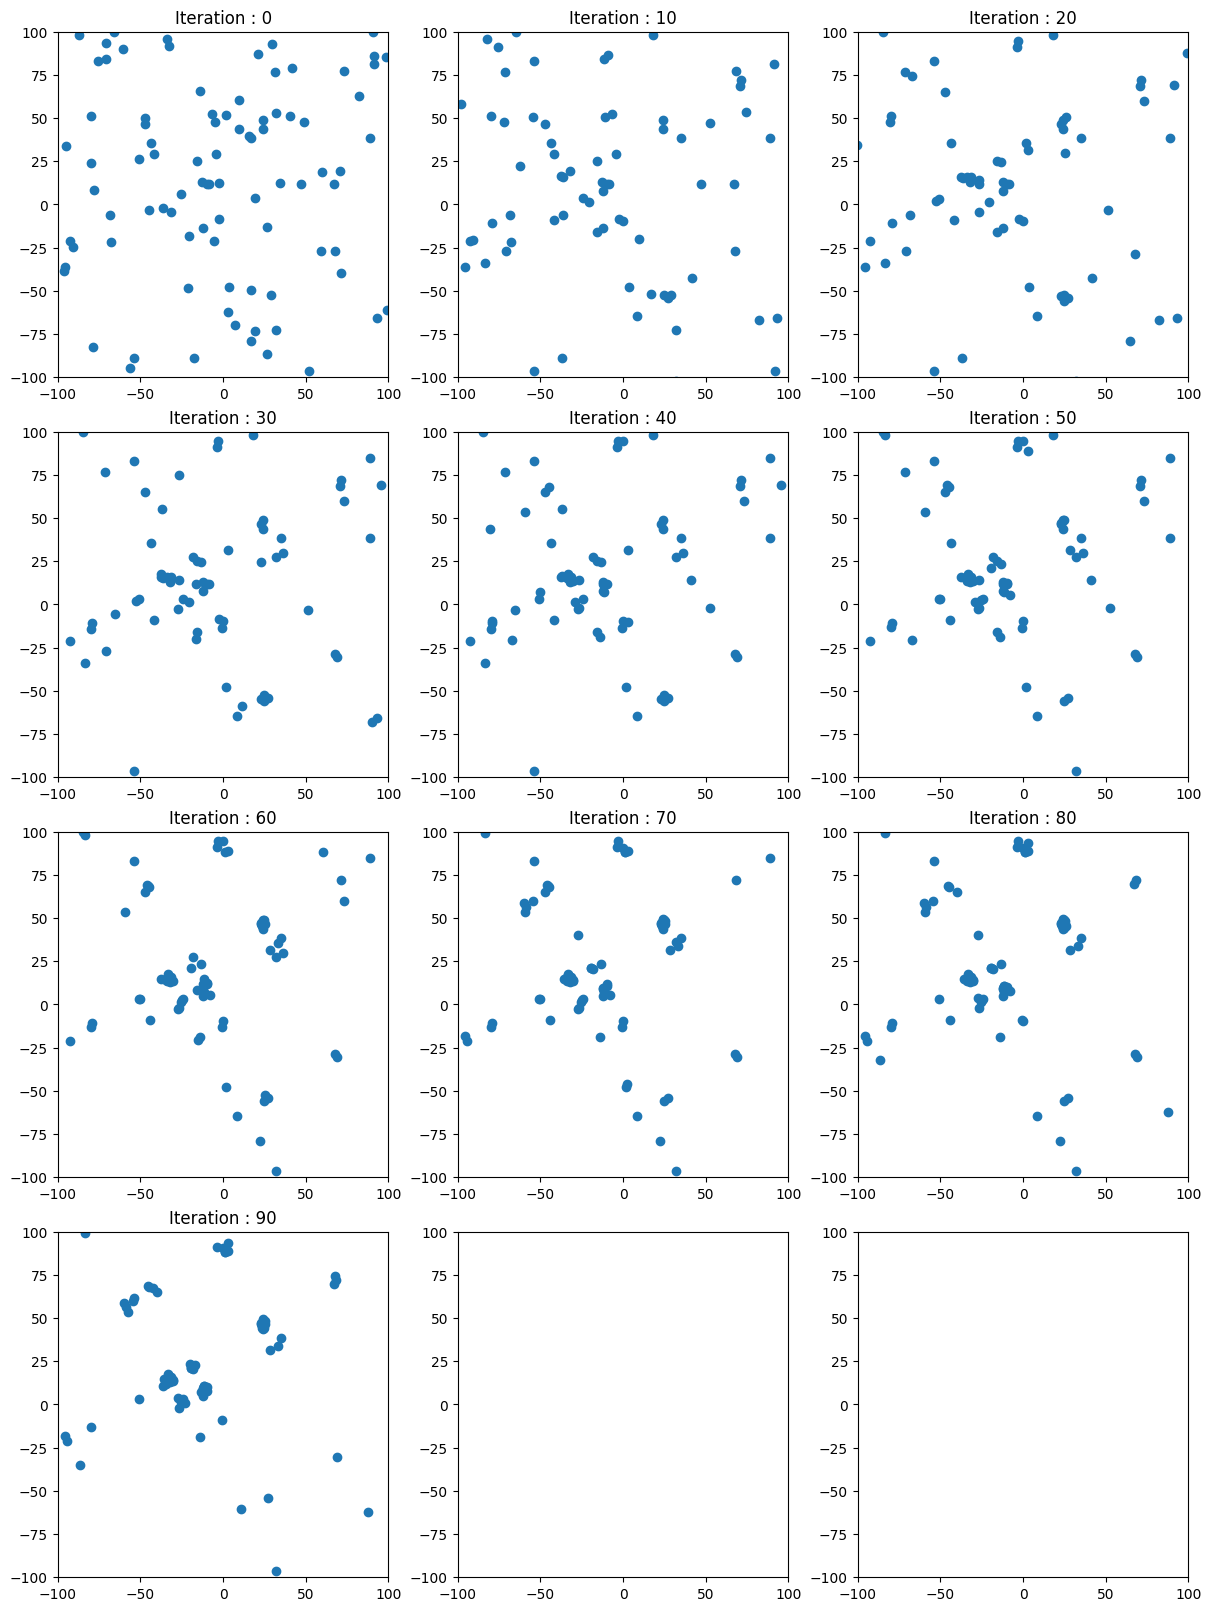

In [162]:
#Plotting of snapshots
SubPlot_kw = {'autoscale_on':False,'xbound':(-100,100),'ybound':(-100,100)}

PlottingSnapshots(snapshots,10,SubPlot_kw)

## Differential Evolution with Clustering

In [163]:
# Init Diff Evol Clustering
functionNumber = '9'
dimension = 2   #Dimensions = 2, 10, 20, 30, 50 or 100. Some functions doesn't work with all dimensions
objectiveFunction = objectiveFunctionCEC(functionNumber,dimension=dimension)

lower , upper = -100 , 100
initializeIndividual = individual(lower,upper,dimension)

clusteringAlgorithm = cluster.dbscan

DiffEvol_Clust = DifferentialEvolution_Clustering(objectiveFunction,initializeIndividual,clusteringAlgorithm)

In [164]:
#Calling Diff Evol Clustering
iterations = 100
populationSize = 100
scalingFactor = 0.7
crossoverRate = 0.5
clusteringAlgorithm_kw = {'eps':5,'min_samples':3}

optimalFound_clust , snapshots_clust = DiffEvol_Clust(iterations,populationSize,scalingFactor,crossoverRate,clusteringAlgorithm_kw)

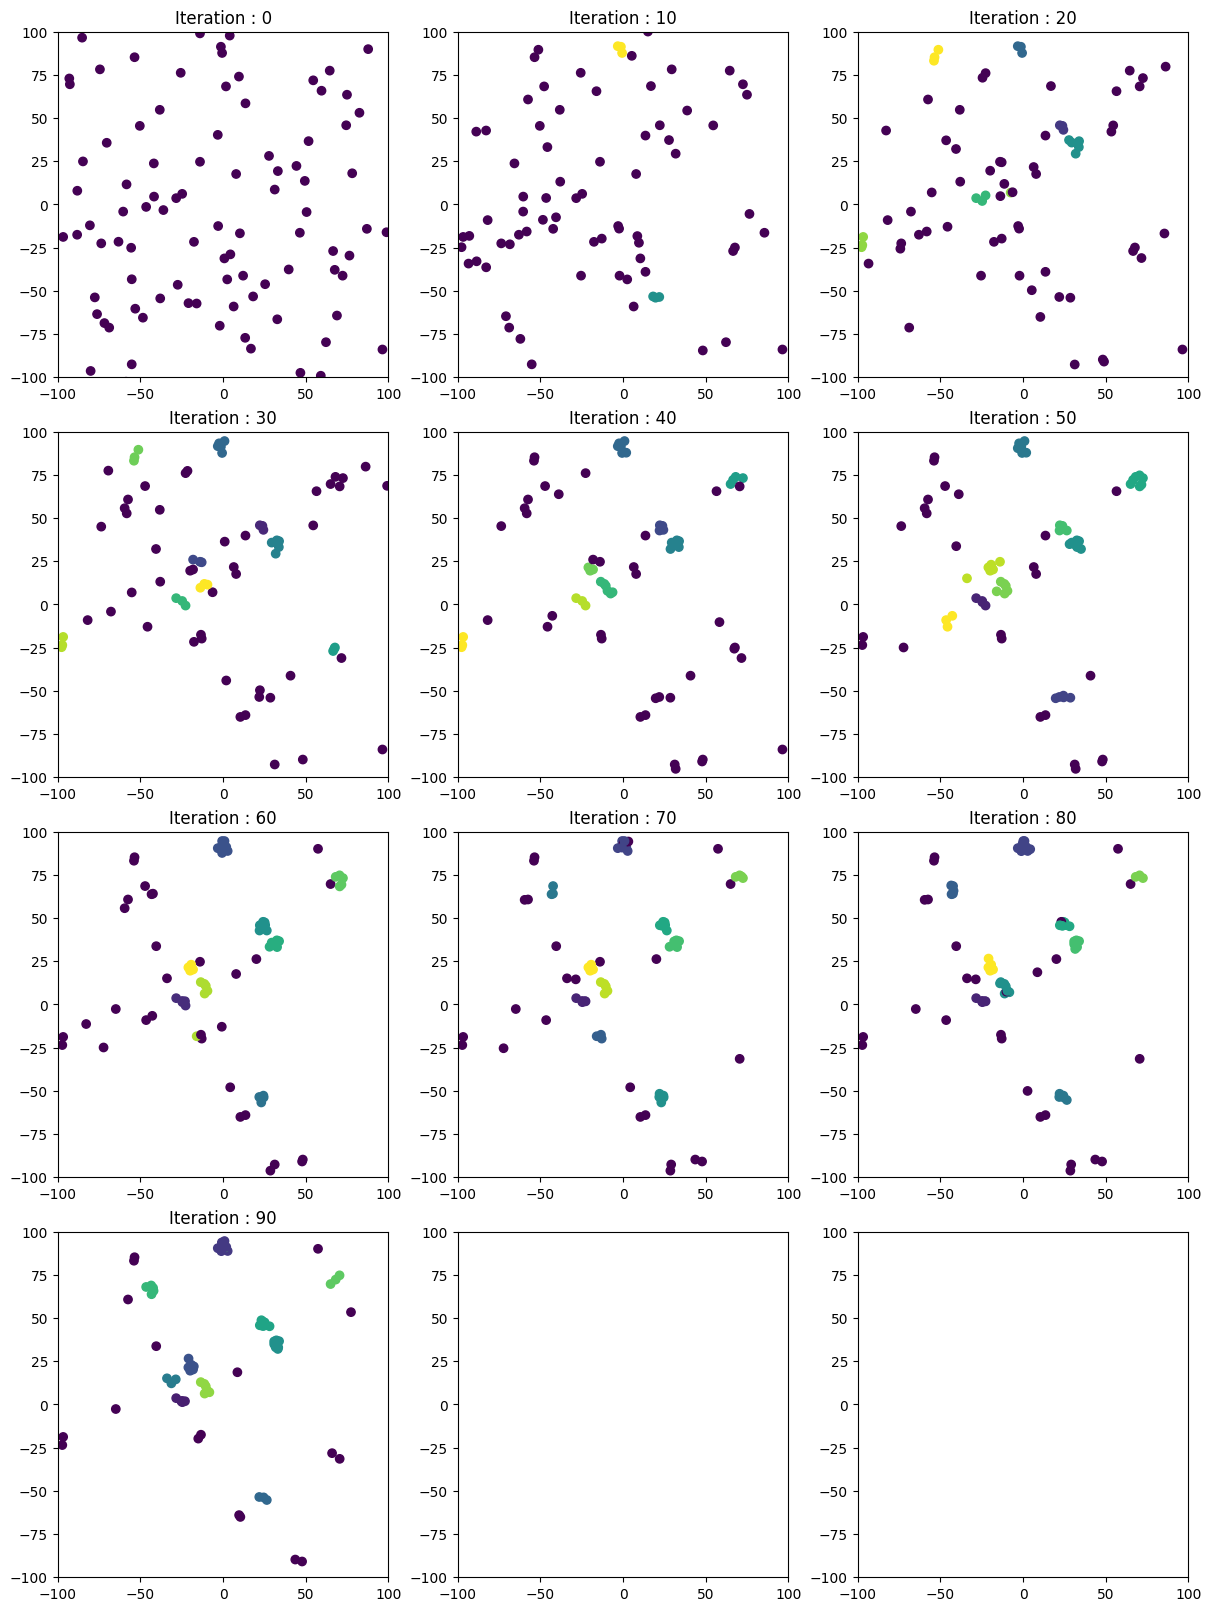

In [165]:
#Plotting of snapshots
SubPlot_kw = {'autoscale_on':False,'xbound':(-100,100),'ybound':(-100,100)}

PlottingSnapshots(snapshots_clust,10,SubPlot_kw)